# Regression problem

## Case of Study: House Sales in King County, USA

### 1. Load the dataset

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# load dataset
dataset = pd.read_csv('dataset/kc_house_data.csv', sep = ',')
metadata = dataset.columns
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# dimensions of dataset
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  21613
#features =  21


In [4]:
# manage metadata
def get_metadata(data):
    metadata = data.columns
    numerical_cols = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

In [5]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)

Numerical features:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Categorical features:  ['date']


### 2. Exploratory Data Analysis (EDA)

In [6]:
# function to filter missing data
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name="missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()

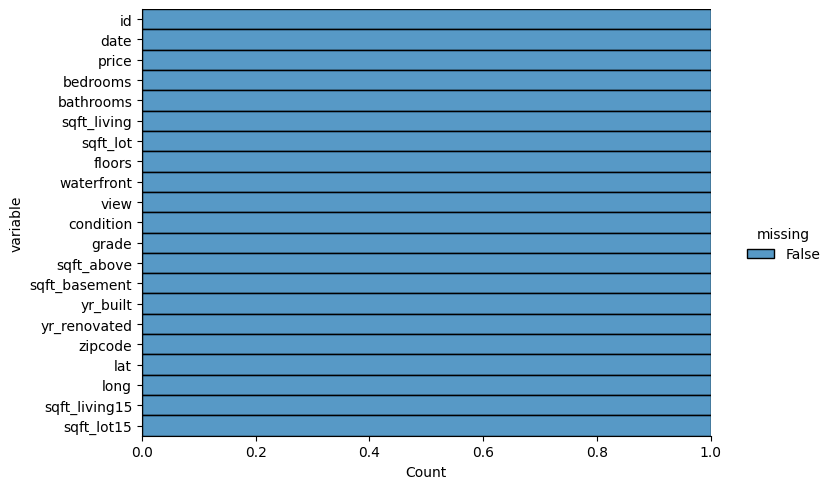

In [7]:
# original state of missing values
filter_missing(dataset)

So, we don't have missing data. Let's see more on numerical features

In [8]:
# function to plot histogram of frequencies
def hist_frequencies(data, numeric_cols, bins):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()

    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

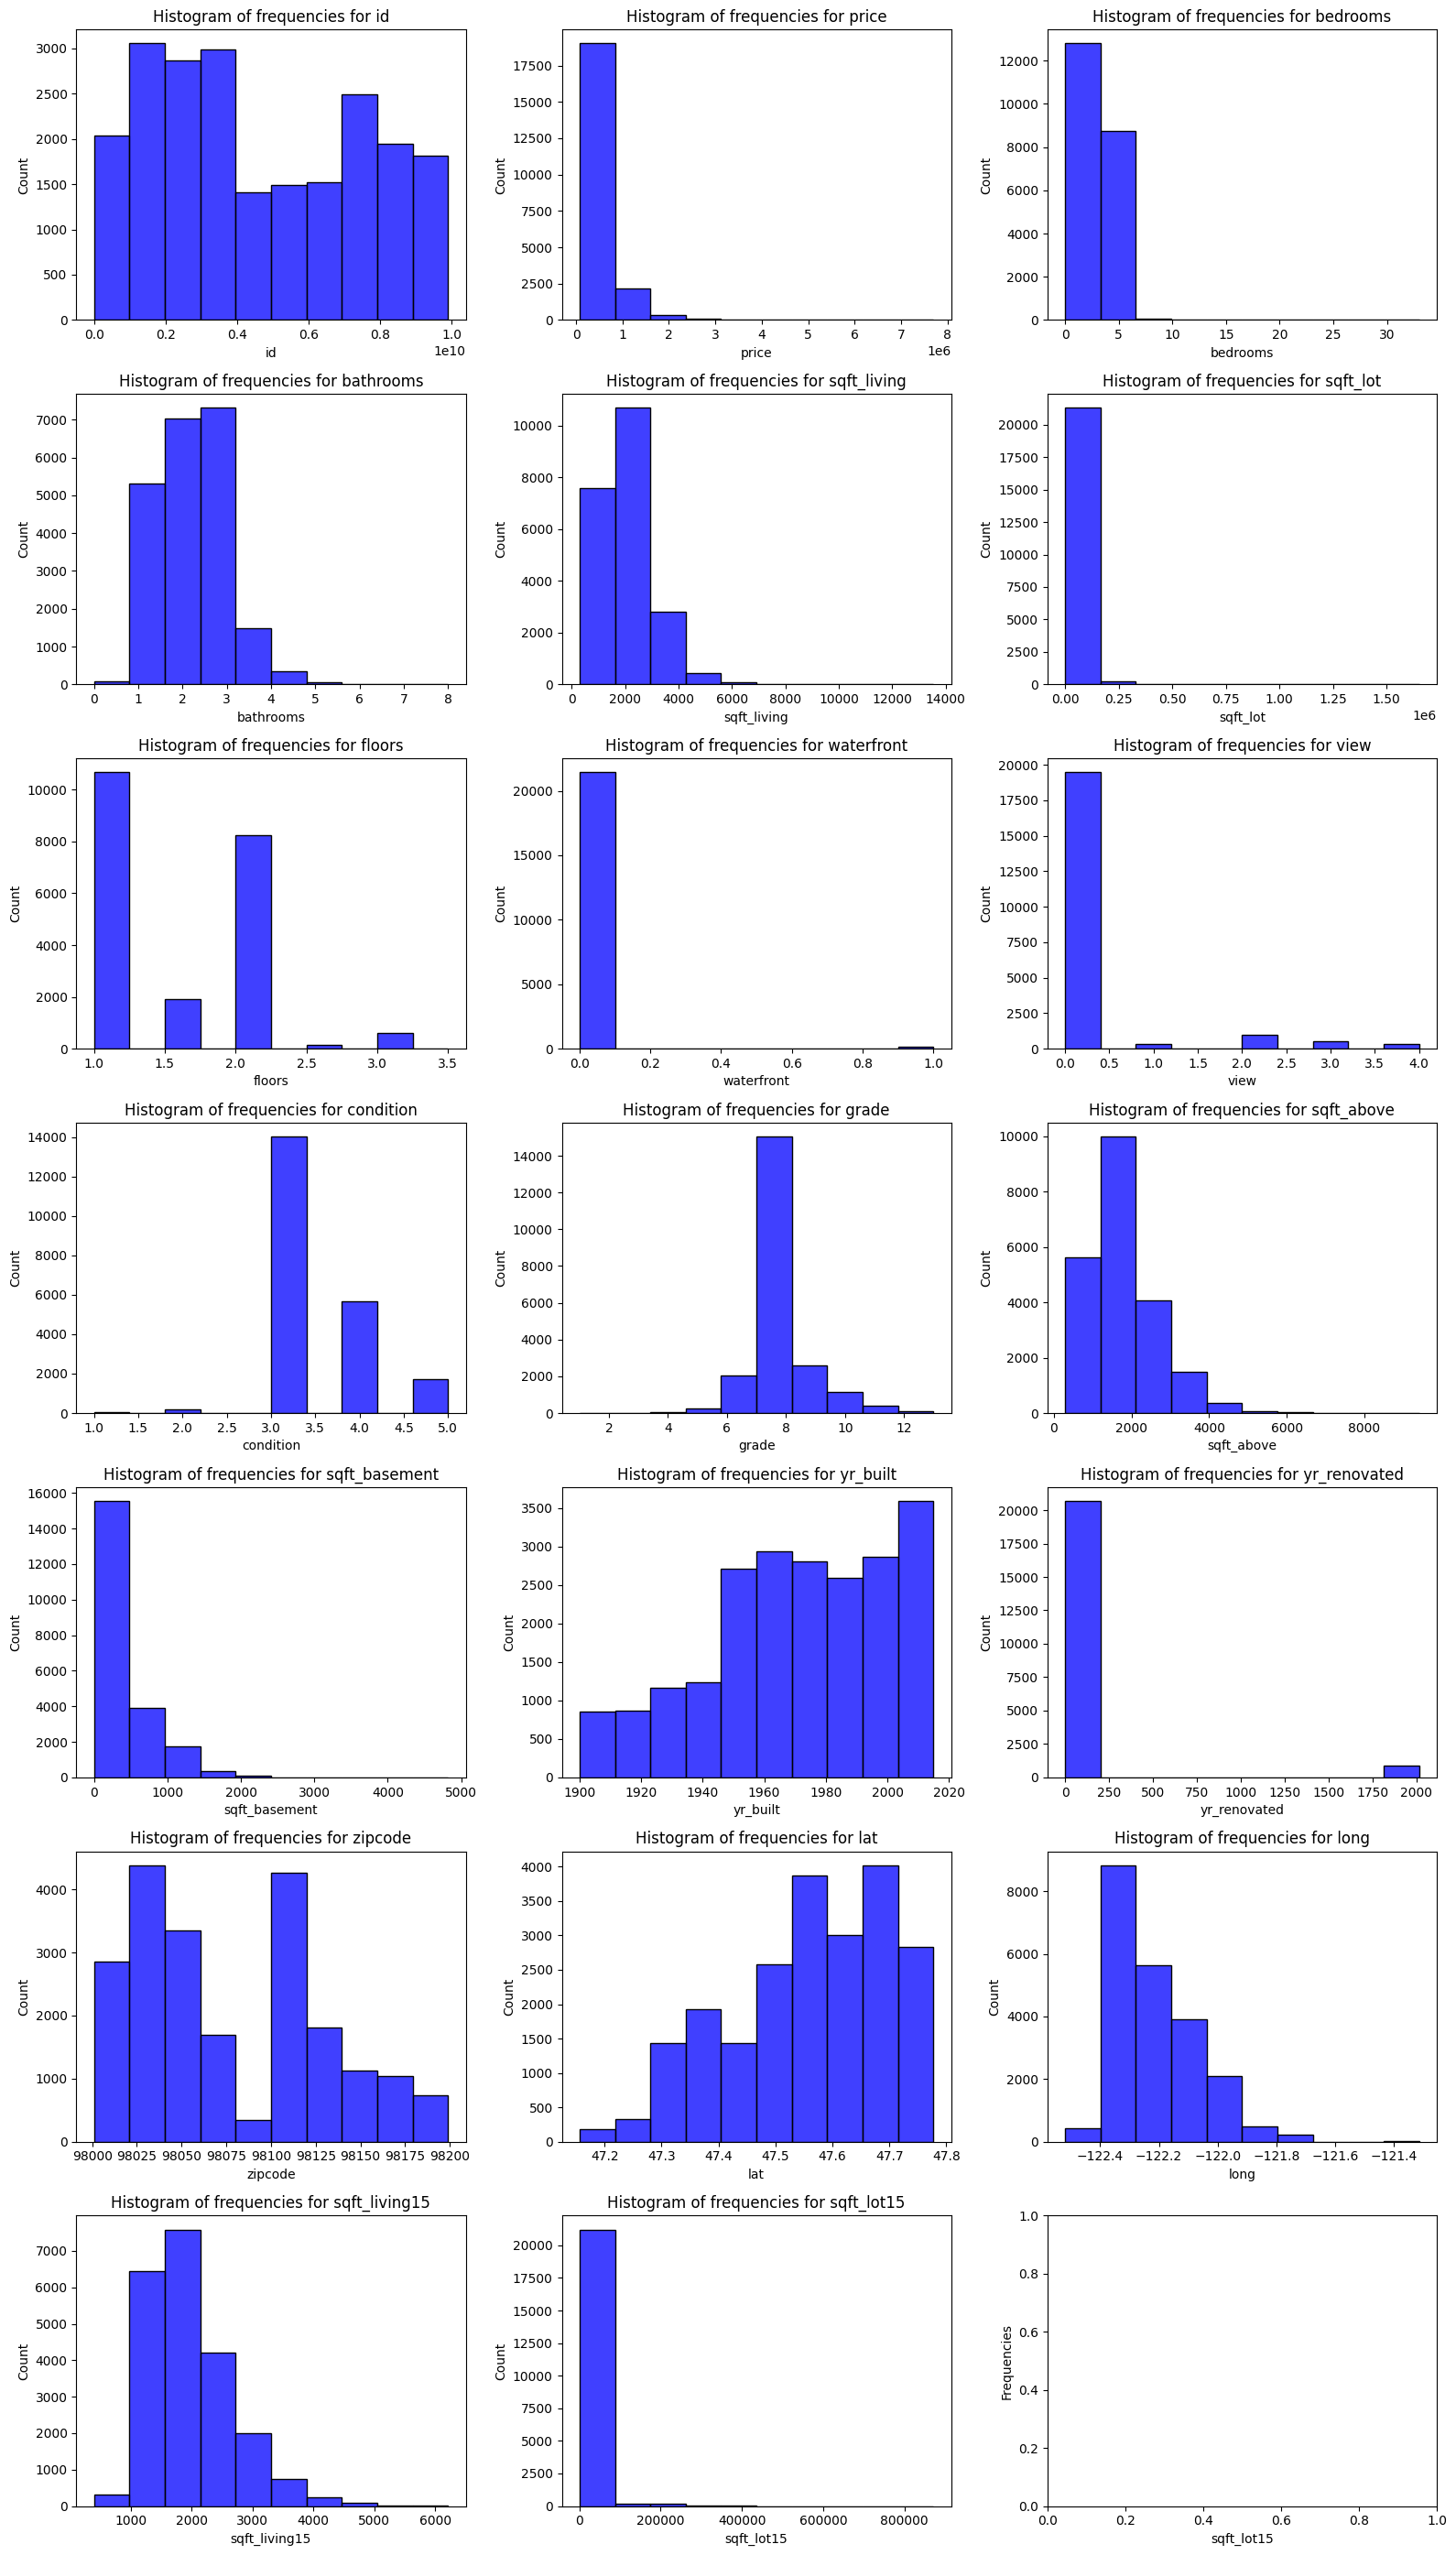

In [9]:
hist_frequencies(dataset, numeric_cols, bins = 10)

In [10]:
# statistical metrics
display(dataset[numeric_cols].describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Categorical Features

In [11]:
# cycle to calculate number of instances in each categorical column
for col in categ_cols:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** date ******
date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: count, Length: 372, dtype: int64


### 3.Data Preparation

Feature Engineer

In [12]:
# drop the columns which don't have any relevance
def feature_engineer(data):
    # extract information from date 
    #a specific day does not give us information, 
    #but the day of the week can hypothetically affect the price
    data["date"] = pd.to_datetime(data["date"], errors = "coerce")
    data["SaleDayOfWeek"] = data["date"].dt.dayofweek
    
    # drop non-relevant columns 
    nrelev_cols = ["id", "sqft_lot", 'waterfront', 'yr_renovated', 'sqft_lot15', "date"]
    data = data.drop(nrelev_cols, axis = 1)

    return data

In [13]:
dataset = feature_engineer(dataset)

In [14]:
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  21613
#features =  16


In [15]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)
print("Numerical features: ", numeric_cols)
print("Categorical features: ", categ_cols)

Numerical features:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15']
Categorical features:  []
Numerical features:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15']
Categorical features:  []


In [16]:
from sklearn.impute import KNNImputer

def imputation_data(data, num_cols):
    # imputation for numerical columns
    knn_imputer = KNNImputer(n_neighbors = 5)
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])
    
    return data

In [17]:
data = imputation_data(dataset, numeric_cols)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,SaleDayOfWeek
0,221900.0,3.0,1.00,1180.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,98178.0,47.5112,-122.257,1340.0,0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951.0,98125.0,47.7210,-122.319,1690.0,1
2,180000.0,2.0,1.00,770.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,98028.0,47.7379,-122.233,2720.0,2
3,604000.0,4.0,3.00,1960.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,98136.0,47.5208,-122.393,1360.0,1
4,510000.0,3.0,2.00,1680.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,98074.0,47.6168,-122.045,1800.0,2


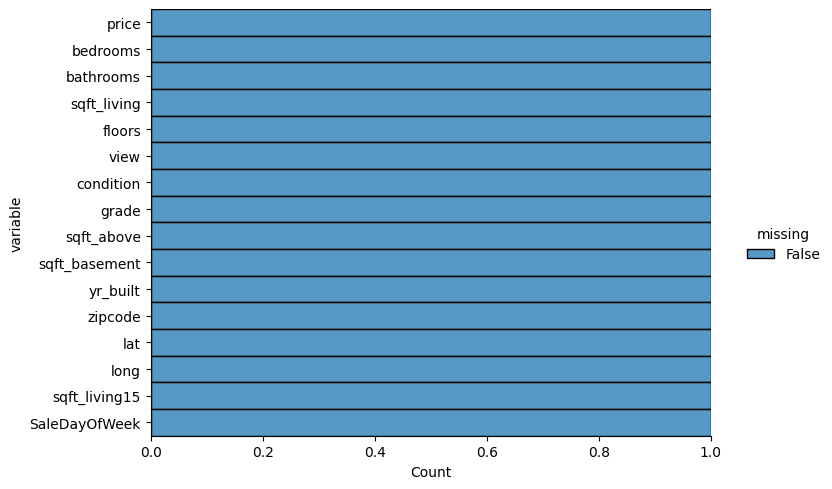

In [18]:
# state of missing values after imputation
#We didn't have them before, but just in case
filter_missing(dataset)

Exploration of Data after Imputation

In [19]:
# check type of relationship between variables
def gen_pairplot(data, metadata):
    sbn.set_theme(context = 'notebook', style = 'darkgrid')    
    sbn.pairplot(data[metadata], height = 2.0)
    plt.show()

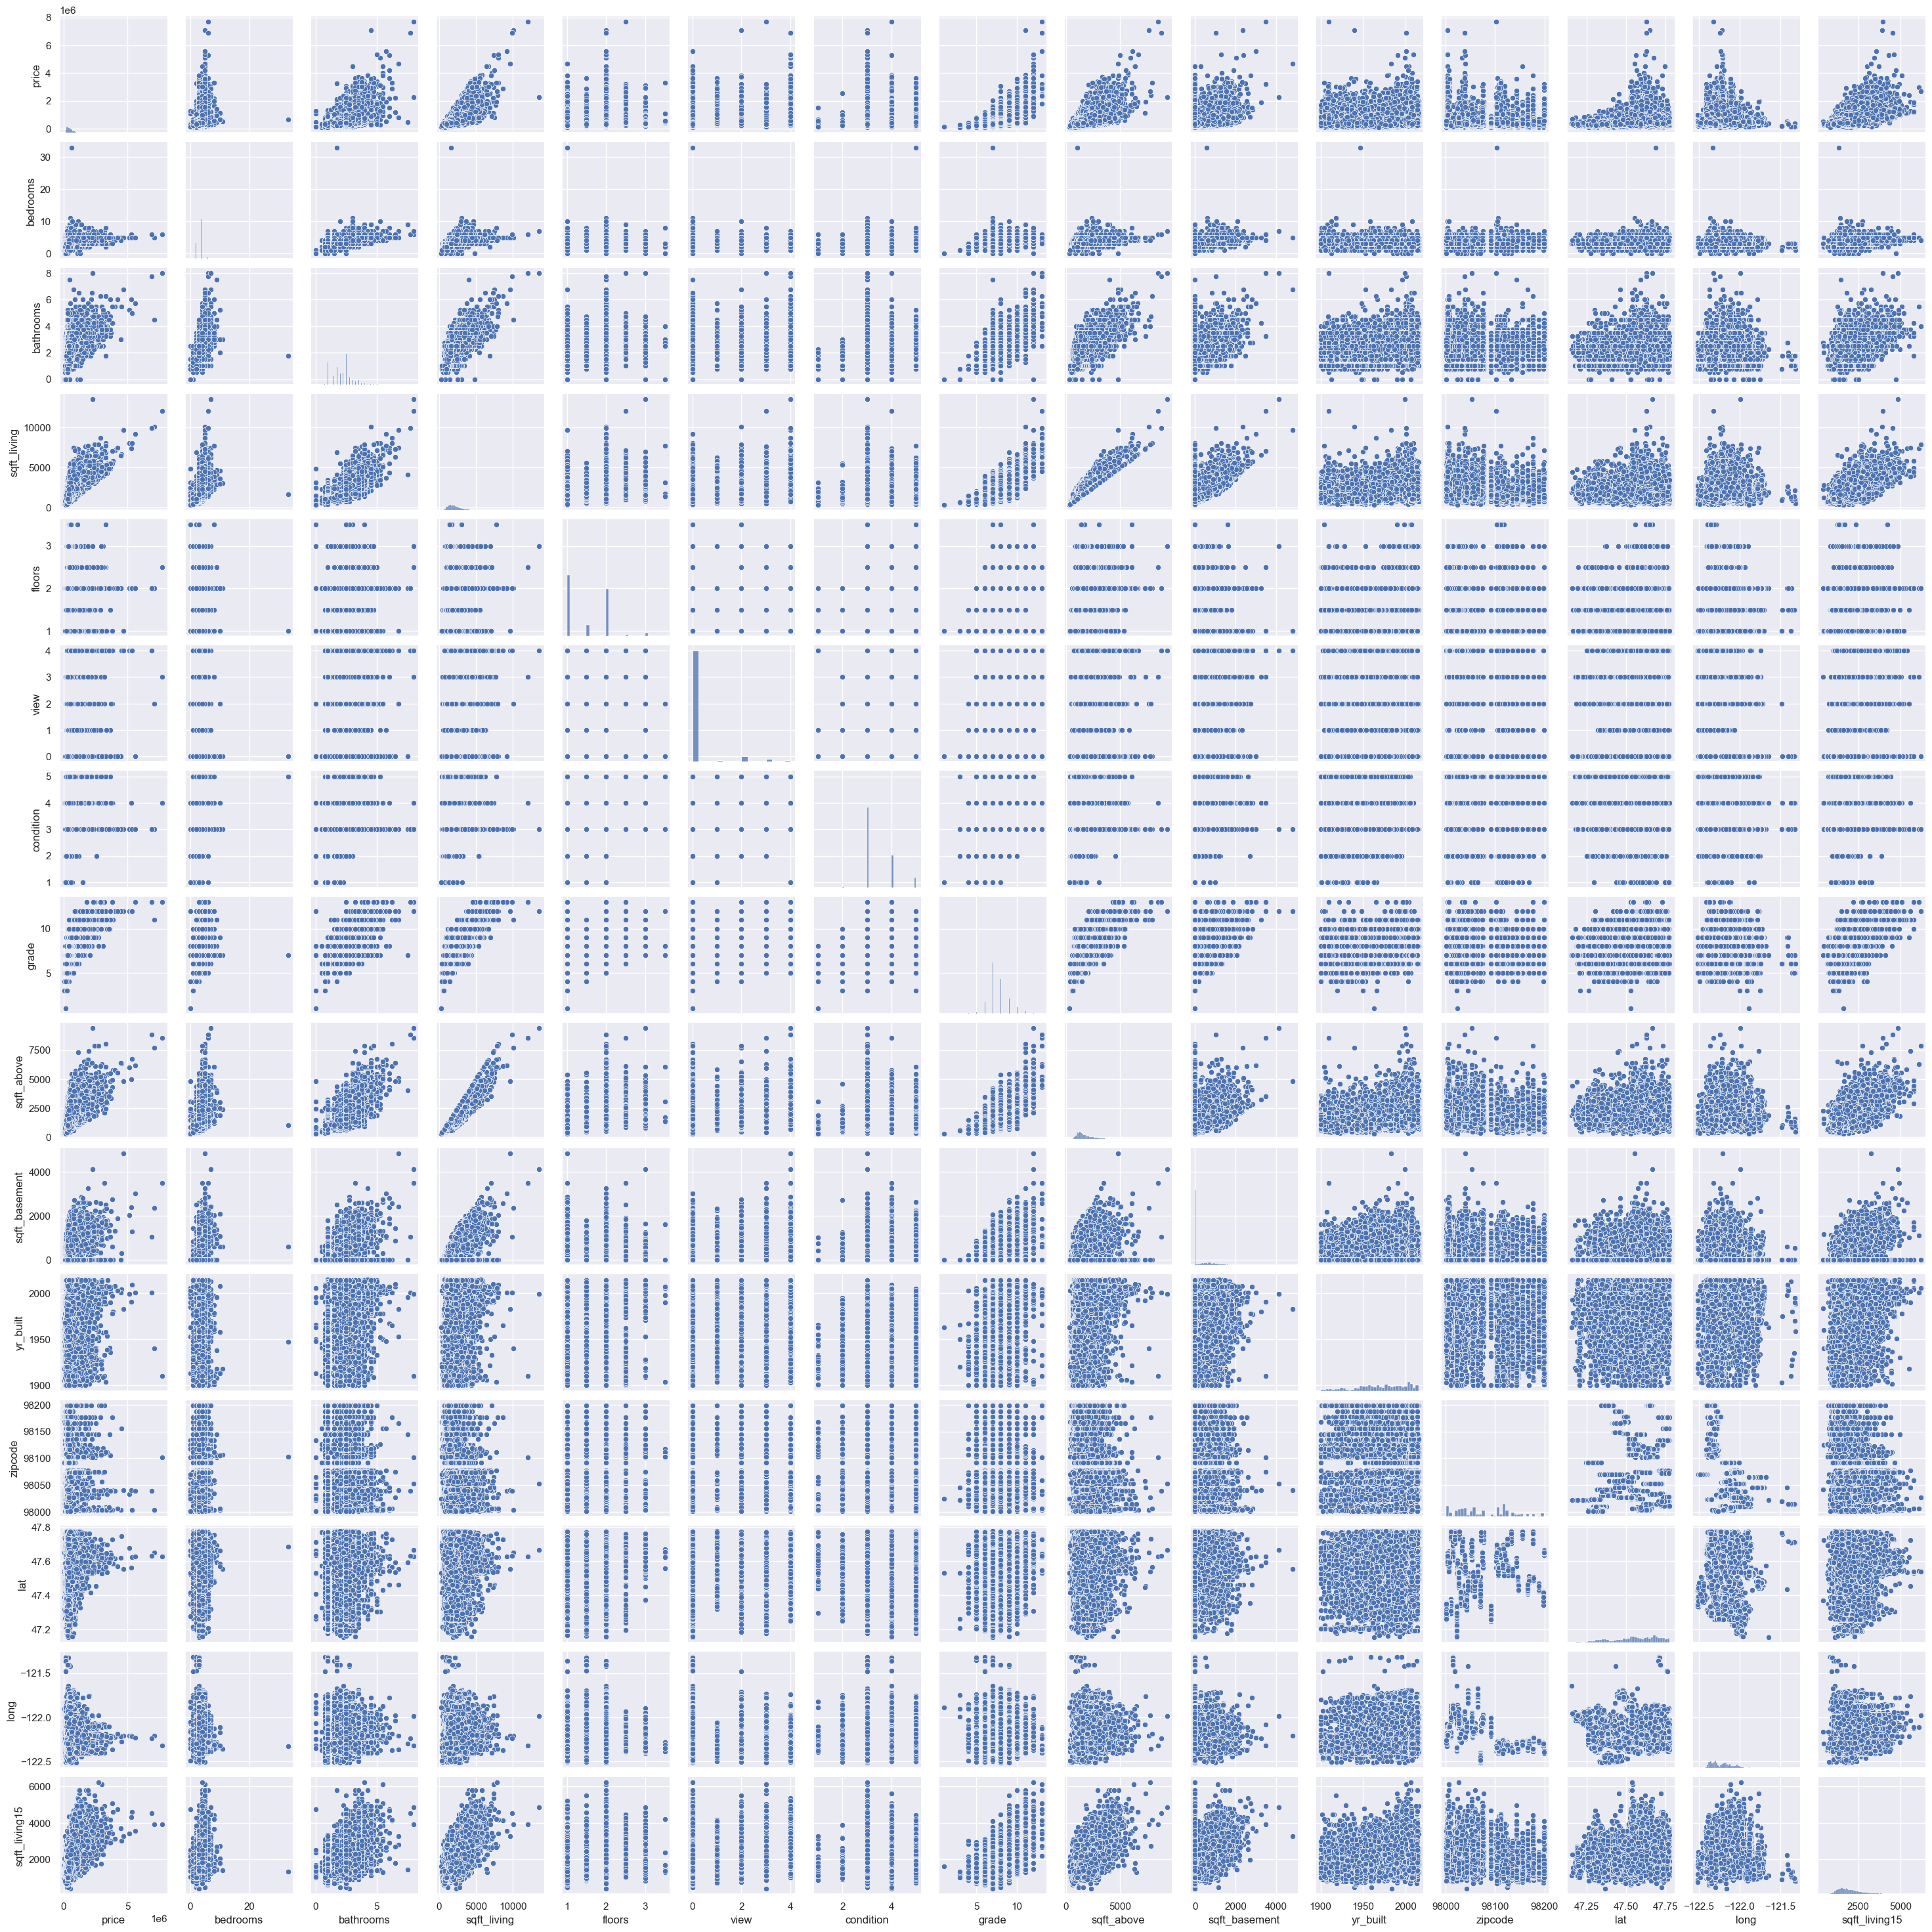

In [20]:
gen_pairplot(dataset, numeric_cols)

In [21]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap="coolwarm")
    plt.xticks(range(len(cols)), cols, rotation=90)
    plt.yticks(range(len(cols)), cols)

    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha="center", va="center", color="black", fontsize=8) 
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

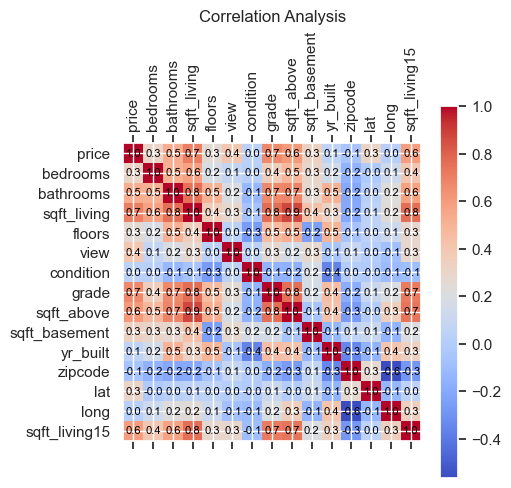

In [22]:
plot_correlation(dataset, numeric_cols)

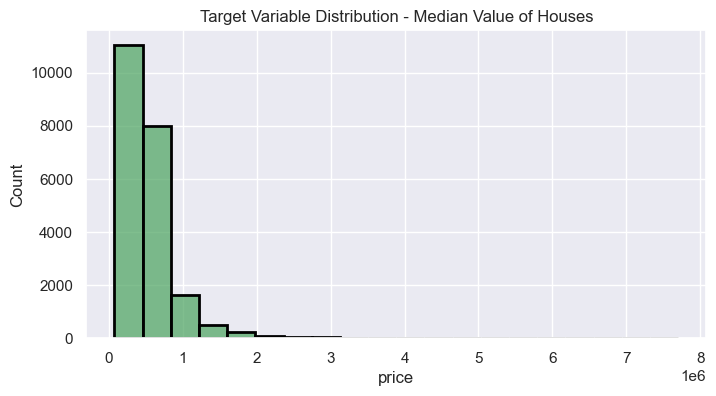

In [23]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["price"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median Value of Houses")
plt.show()

### 4. Data Preprocessing

In [38]:
x = dataset.loc[:, dataset.columns != "price"]
y = dataset["price"]

In [39]:
x.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,SaleDayOfWeek
0,3.0,1.00,1180.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,98178.0,47.5112,-122.257,1340.0,0
1,3.0,2.25,2570.0,2.0,0.0,3.0,7.0,2170.0,400.0,1951.0,98125.0,47.7210,-122.319,1690.0,1
2,2.0,1.00,770.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,98028.0,47.7379,-122.233,2720.0,2
3,4.0,3.00,1960.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,98136.0,47.5208,-122.393,1360.0,1
4,3.0,2.00,1680.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,98074.0,47.6168,-122.045,1800.0,2


In [40]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (21613, 15)
Dimension of target =  (21613,)


Split train and test set

In [41]:
# split train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (17290, 15)
Y-train:  17290
X-test dim:  (4323, 15)
Y-test:  4323


In [42]:
# take metadata
metadata, numeric_cols, categ_cols = get_metadata(x)

Numerical features:  ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15']
Categorical features:  []


In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

transformer = make_column_transformer(
    (StandardScaler(), ['bedrooms', 'bathrooms', 'floors', 'yr_built', 'lat', 'long']),
    (RobustScaler(), ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'zipcode']),
    (OrdinalEncoder(), ['view', 'condition', 'grade']) 
)

In [44]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['bedrooms', 'bathrooms', 'floors', 'yr_built',
                                  'lat', 'long']),
                                ('robustscaler', RobustScaler(),
                                 ['sqft_living', 'sqft_above', 'sqft_basement',
                                  'sqft_living15', 'zipcode']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['view', 'condition', 'grade'])])

standardscaler
['bedrooms', 'bathrooms', 'floors', 'yr_built', 'lat', 'long']

robustscaler
['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'zipcode']

ordinalencoder
['view', 'condition', 'grade']

In [ ]:
ColumnTransformer?i
ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['bedrooms', 'bathrooms', 'floors', 'yr_built',
                                  'lat', 'long']),
                                ('robustscaler', RobustScaler(),
                                 ['sqft_living', 'sqft_above', 'sqft_basement',
                                  'sqft_living15', 'zipcode']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['view', 'condition', 'grade'])])
standardscaler

 StandardScaler?
robustscaler

 RobustScaler?
ordinalencoder

 OrdinalEncoder

In [45]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [46]:
x_train

array([[-0.39003389, -1.44813729, -0.91794048, ...,  0.        ,
         3.        ,  5.        ],
       [-0.39003389,  0.49429638, -0.91794048, ...,  0.        ,
         3.        ,  6.        ],
       [-0.39003389, -0.8006594 , -0.91794048, ...,  0.        ,
         2.        ,  6.        ],
       ...,
       [-0.39003389,  0.17055743, -0.91794048, ...,  0.        ,
         3.        ,  7.        ],
       [ 0.67029408, -0.15318151,  0.92508233, ...,  0.        ,
         3.        ,  6.        ],
       [ 0.67029408,  0.17055743, -0.91794048, ...,  0.        ,
         2.        ,  5.        ]])

In [47]:
y_train

5268      495000.0
16909     635000.0
16123     382500.0
12181     382500.0
12617     670000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 17290, dtype: float64

### 5. Building Model

Benchmark for models:

1) XGBoost Regressor
2) LightGBM

In [48]:
from sklearn.model_selection import GridSearchCV
import time

In [49]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [50]:
# function to load model
def load_model(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

In [51]:

# function to evaluate model
from sklearn.metrics import mean_squared_error, r2_score

def eval_model_perform(model, x, y):    
    y_pred = model.predict(x)
    rmse_val = np.sqrt(mean_squared_error(y, y_pred))
    r2_val = r2_score(y, y_pred)

    return rmse_val, r2_val

#### 5.1 XGBoost Regressor

Model Definition

In [52]:
import xgboost as xgb

# hyperparameters definition
xgb_params = {          
    "max_depth": [8, 16, 32],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.8, 0.9],
    "tree_method": ["hist"],
    "objective": ["reg:squarederror"]
}

In [53]:
# define XGB Model
def XGBModel(x_train, y_train, params):
    # define the model    
    model = xgb.XGBRegressor()
    
    # hyperparameter optimization
    grid_search = GridSearchCV(estimator = model,
                               param_grid = params,
                               scoring = "neg_mean_squared_error",
                               cv = 5,
                               n_jobs = -1
                            )
    grid_search.fit(x_train, y_train)
    
    # get best model
    best_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    
    return best_model

Training process

In [54]:
sttrain_xgb = time.time()

In [55]:
xgb_model = XGBModel(x_train, y_train, xgb_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'objective': 'reg:squarederror', 'subsample': 0.7, 'tree_method': 'hist'}


In [56]:
ettrain_xgb = time.time()
ttrain_xgb = ettrain_xgb - sttrain_xgb
print(f"Time of training: {ttrain_xgb:.3f} seconds")

Time of training: 1689.544 seconds


In [57]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
# save xgb model
save_model("models/xgb_v1.pkl", xgb_model)

Evaluation process

In [59]:
# recover the model
rec_xgb = load_model("models/xgb_v1.pkl")

In [60]:
# metrics for train set
rmse_xgb_train, r2_xgb_train = eval_model_perform(rec_xgb, x_train, y_train)
print(f"R-MSE train score: {rmse_xgb_train:.3f}")
print(f"R^2 train score: {r2_xgb_train:.3f}")

R-MSE train score: 62612.092
R^2 train score: 0.972


In [61]:
# r2-score for test set
rmse_xgb_test, r2_xgb_test = eval_model_perform(rec_xgb, x_test, y_test)
print(f"R-MSE test score: {rmse_xgb_test:.3f}")
print(f"R^2 test score: {r2_xgb_test:.3f}")

R-MSE test score: 112450.009
R^2 test score: 0.894


#### 5.2. Light Gradient Boost Machine (LightGBM)

Model Definition

In [62]:
# import packages
import lightgbm as lgbm

# define grid hyperparameters
lgbm_params = {    
    "num_leaves": [64, 128, 256],
    "max_depth": [10, 20, 40],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9],
    "subsample_freq": [10] # re-sample without replacement every 10 iterations
                         # and extract bagging_fraction% of training data
}

In [63]:
# define the LightGBM regressor
def LightGBModel(x_train, y_train, params):
    lgbm_model = lgbm.LGBMRegressor()
    
    # hyperparameter optimization
    grid_lgbm = GridSearchCV(estimator = lgbm_model,  # regressor model
                         param_grid = params,  # dict of hyperparameters
                         cv = 5,   # 5-fold cross-validation
                         scoring = "r2",
                         verbose = False,
                         n_jobs = -1
                    )
    # fit the model
    grid_lgbm.fit(x_train, y_train)
    
    # take best model
    best_model = grid_lgbm.best_estimator_
    print(grid_lgbm.best_params_)

    return best_model

Training process

In [64]:
sttrain_lgbm = time.time()

In [65]:
# take the best model
lgbm_model = LightGBModel(x_train, y_train, lgbm_params)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1762
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 14
[LightGBM] [Info] Start training from score 542799.837767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
{'learning_rate': 0.05, 'max_depth': 20, 'num_leaves': 128, 'subsample': 0.8, 'subsample_freq': 10}


In [66]:
ettrain_lgbm = time.time()
ttrain_lgbm = ettrain_lgbm - sttrain_lgbm
print(f"Time of training: {ttrain_lgbm:.3f}")

Time of training: 209.705


In [67]:
lgbm_model

LGBMRegressor(learning_rate=0.05, max_depth=20, num_leaves=128, subsample=0.8,
              subsample_freq=10)

LGBMRegressor(learning_rate=0.05, max_depth=20, num_leaves=128, subsample=0.8,
              subsample_freq=10)

In [68]:
# save ligthgbm model
save_model("models/lgbm_v1.pkl", lgbm_model)

Evaluation process

In [69]:
# recover the model
rec_lgbm = load_model("models/lgbm_v1.pkl")

In [70]:
# metrics for train set
rmse_lgbm_train, r2_lgbm_train = eval_model_perform(rec_lgbm, x_train, y_train)
print(f"R-MSE train score: {rmse_lgbm_train:.3f}")
print(f"R^2 train score: {r2_lgbm_train:.3f}")

R-MSE train score: 98225.470
R^2 train score: 0.930


In [71]:
# r2-score for test set
rmse_lgbm_test, r2_lgbm_test = eval_model_perform(rec_lgbm, x_test, y_test)
print(f"R-MSE test score: {rmse_lgbm_test:.3f}")
print(f"R^2 test score: {r2_lgbm_test:.3f}")

R-MSE test score: 119263.825
R^2 test score: 0.880


### 6. Monitoring results

In [72]:
dict_res = {
    "xgboost": pd.DataFrame({
        "train": {"rmse": rmse_xgb_train, "r2": r2_xgb_train},
        "test": {"rmse": rmse_xgb_test, "r2": r2_xgb_test}
    }),
    "lgbm": pd.DataFrame({
        "train": {"rmse": rmse_lgbm_train, "r2": r2_lgbm_train},
        "test": {"rmse": rmse_lgbm_test, "r2": r2_lgbm_test}
    })
}

In [73]:
for key, res in dict_res.items():
    print(f"\nModel: {key}")
    print(res)


Model: xgboost
             train           test
rmse  62612.091955  112450.008627
r2        0.971736       0.893672

Model: lgbm
             train           test
rmse  98225.470396  119263.824589
r2        0.930439       0.880396


In [74]:
import seaborn as sns

def plot_reg_results(res):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Iterate over the dictionary and plot the results for each model
    sns.set_theme(style="whitegrid")
    for i, (key, res) in enumerate(dict_res.items()):
        # Plot the RMSE values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["rmse"], res["test"]["rmse"]], ax=ax[0])
        # Plot the R2 values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["r2"], res["test"]["r2"]], ax=ax[1])

    # Set the titles and labels for the subplots
    ax[0].set_title("RMSE")
    ax[0].set_xlabel("Model")
    ax[0].set_ylabel("RMSE")

    ax[1].set_title("R2")
    ax[1].set_xlabel("Model")
    ax[1].set_ylabel("R2")

    # Show the plot
    plt.show()

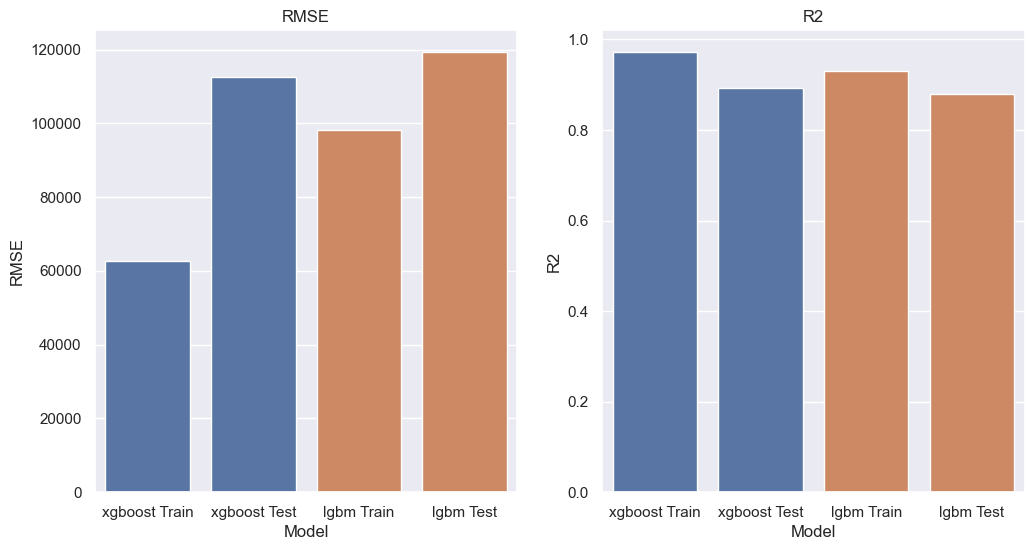

In [75]:
# monitoring the results
plot_reg_results(dict_res)